#  1일차 - 데이터 수집 / 2019 년 데이터 정제

## 패키지 임포트

In [1]:
#데이터 전처리 패키지
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno

#머신러닝 패키지
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

##  데이터프레임 및 전후반기 데이터 결합

In [ ]:
# 데이터 불러오기
df_2019 = pd.read_csv("구급활동현황(2019년).csv", encoding ='cp949')

In [ ]:
# 미사용 데이터 제거
df_2019.drop(['집계년도','접수경로','관할구분','질병외_교통사고','질병외_사고부상','질병외_비외상성손상','구급대원1_자격','구급대원2_자격','운전요원_자격'], axis=1)

In [ ]:
# 기존 데이터의 전후반기 데이터 오류로 전반기 데이터 별도 출력 후 저장
df_modified = df_2019.loc[0:392873,:]
df_modified.to_csv("df_noname3.csv", encoding="utf-8-sig", index=False)

df_modified2 = df_2019.loc[392874:,:]
df_modified2.to_csv("df_noname4.csv", encoding="utf-8-sig", index=False)


In [ ]:
df_1sthalf = pd.read_csv("df_noname3.csv", encoding='utf-8')
df_2ndhalf = pd.read_csv("df_noname4.csv", encoding='utf-8')

In [ ]:
# 데이터 결합
df_2019_done = pd.concat([df_1sthalf,df_2ndhalf], axis=0)
df_2019_done.to_csv("2019_done_final2.csv", encoding="utf-8-sig", index=False)

In [ ]:
df_done_2019 = pd.read_csv("2019_done.csv", encoding="utf-8")
# 영어이름으로 컬럼변경
df_done_2019.columns = ["FIRESTTN_NM","SAFE_CENTER_NM","YMD","STATMNT_TM","ONSPOT_TM","ONSPOT_DSTN","LC_SIGNGU","LC_EMD","LC_LI","CONSCS_STATE"]

In [ ]:
df_done_2019__ = pd.read_csv("2019_done_final2.csv", encoding="utf-8")


In [ ]:
df_done_2019__.drop(['Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35'], axis=1, inplace=True)
df_done_2019__.to_csv("2019_done_final_귀소시간유지.csv", encoding="utf-8-sig", index=False)

## 1일차 - 개인별 열정리완료 데이터 모음

In [ ]:
import pandas as pd
import numpy as np

df_sso = pd.read_csv("2017년열삭제1.csv", encoding="utf-8-sig")
df_ddoong = pd.read_csv("2018열삭제.csv", encoding="utf-8-sig")
df_PSB = pd.read_csv("2020_done.csv", encoding="utf-8-sig")
df_goni = pd.read_csv("2019_real_done.csv", encoding="utf-8-sig")
df_lee = pd.read_csv("2016_done2.csv", encoding="utf-8-sig")


In [ ]:
# 최종 데이터프레임으로 결합
df_complete = pd.concat([df_sso, df_goni, df_ddoong, df_PSB, df_lee], axis=0)

In [ ]:
# PK 값 삽입 후 최종 파일 저장
df_pk = df_complete.copy() # 안전을 위해 복사후 처리
df_pk.insert(0,"PK",np.arange(1,6345059))
df_pk.to_csv("aid_03231522.csv", encoding="utf-8-sig", index=False)

## 1일차 - 긴급Help 도전

In [ ]:
##영준 help
df_0323 = pd.read_csv("aid_03231542.csv", encoding="utf-8-sig")

In [ ]:
df_check = df_0323.loc[:,"ONSPOT_TM"]
df_dbcheck = df_0323.loc[:,"STATMNT_TM"]

In [ ]:
# 시간 : 분 에서 시간만 추출하기
df_0323['STATMNT_TM'] = df_0323.STATMNT_TM.str.split(':').str[0]

In [ ]:
##성범이형 HELP

if (len(for i in (df_0323['ONSPOT_TM'].tolist())) > 7) :
    df_0323['dbc4'] = True
else :
    df_0323['dbc4'] = False

# 숫자데이터 오류 발견 후 해결과정
df_0323['ONSPOT_TM'] = df_0323['ONSPOT_TM'].replace(r'0.[0-9]+','삭제',regex= True)
    

## 전처리 - 소방서, 센터데이터 레이블 인코딩

In [3]:
# 결측치 처리 완료 코딩
df_misdone = pd.read_csv("aid_all.csv", encoding="utf-8")

FileNotFoundError: [Errno 2] No such file or directory: 'aid_all.csv'

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df_misdone

In [ ]:
# 소방서, 안전센터명 레이블 인코딩

from sklearn.preprocessing import LabelEncoder
safe = LabelEncoder() #안전센터
safe.fit(df_misdone.SAFE_CENTER_NM)

fire = LabelEncoder() # 소방서
fire.fit(df_misdone.FIRESTTN_NM) 

In [ ]:
#소방서, 안전센터명 종류 출력
safe_series = pd.Series(safe.classes_)
fire_series = pd.Series(fire.classes_)


df_kind = pd.DataFrame([safe_series, fire_series])
df_kind = df_kind.transpose()
df_kind.columns = ['SAFE_CENTER_NM','FIRESTTN_NM']
df_kind

In [ ]:
df_kind.to_csv("check_119.csv", encoding = 'utf-8-sig', index=False)

In [ ]:
# 안전센터, 소방서 레이블 인코딩
safe_encoded = safe.transform(df_misdone.SAFE_CENTER_NM)
fire_encoded = fire.transform(df_misdone.FIRESTTN_NM)

In [ ]:
# 기존 데이터 셋 인코딩 완료값으로 변경
df_misdone.SAFE_CENTER_NM = safe_encoded
df_misdone.FIRESTTN_NM = fire_encoded

In [ ]:
# 이외의 열 삭제
df_misdone.drop(['YMD','STATMNT_TM','ONSPOT_TM','ONSPOT_DSTN','HOMING_TM','CONSCS_STATE'], axis=1, inplace=True)
df_misdone.to_csv("aid_total_1821.csv", encoding="utf-8-sig", index=False)

In [ ]:
#파일로 저장
df_misdone.to_csv("aid_goni_1800.csv", encoding="utf-8-sig", index=False)

In [ ]:
dfdf = pd.read_csv("aid_goni_1800.csv", encoding='utf-8-sig')
dfdf

In [ ]:
df_sso = pd.read_csv("soyoung_0325.csv", encoding="utf-8-sig")

In [ ]:
df_aid_all = pd.merge(dfdf, df_sso, how='left', on='PK')
df_aid_all

In [ ]:
#파일로 저장
df_aid_all.to_csv("aid_all_1816.csv", encoding="utf-8-sig", index=False)


In [ ]:
df_aid_all.drop(['YMD','STATMNT_TM','ONSPOT_TM','ONSPOT_DSTN','HOMING_TM'], axis=1)

# 2,3일차 데이터 전처리
## 센터별 인력현황, 구급대원 현황 매칭 프로젝트
### 제한사항 : 119구조대, 수난인력대 등 이상치 값들이 구분없이 반영되어있음

In [ ]:
dfdf.to_csv("location_119.csv", encoding = 'utf-8-sig', index=False)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 데이터 불러오기
df_people = pd.read_csv("경기도구급차및구급대원현황.csv", encoding='cp949')
df_aid = pd.read_csv("aid_03231522.csv", encoding="utf-8-sig")

In [ ]:
#구급인력 데이터 열정리
df_people.drop(['집계년도', '시군명', '구분명'], axis=1, inplace = True)
df_people.columns = ['SAFE_CENTER_NM','AMB_CNT','PEO_CNT']

In [ ]:
#구급인력 데이터 그룹화
df_people_grouped = df_people.groupby(df_people.SAFE_CENTER_NM, as_index=False)
df_people_grouped.head(10)

In [ ]:
#그룹별 평균값 구하기
df_people_mean = round(df_people_grouped.mean())
df_people_mean.head()

In [ ]:
# 구해진 평균값으로 최종 데이터에 결합
df_merged = pd.merge(df_aid, df_people_mean, how='left', on='SAFE_CENTER_NM')
df_merged.head()

In [ ]:
import missingno
missingno.bar(df_merged)

### 안전센터가 포함된 값만 반영

In [ ]:
import pandas as pd
import numpy as np

# ~안전센터로 끝나는 값들을 별도 데이터프레임으로 생성 후 매칭

# 데이터 불러오기
df_people = pd.read_csv("../경기도구급차및구급대원현황.csv", encoding='cp949')
df_aid = pd.read_csv("../aid_03231522.csv", encoding="utf-8-sig")

#구급인력 데이터 열정리
df_people.drop(['집계년도', '시군명', '구분명'], axis=1, inplace = True)
df_people.columns = ['SAFE_CENTER_NM','AMB_CNT','PEO_CNT']

In [ ]:
# '안전센터'가 포함되는 값만 살리기
mask = df_people.SAFE_CENTER_NM.str.contains("안전센터")
df_safeonly2 = df_people[mask]
df_safeonly2.count()

In [ ]:
#구급인력 데이터 그룹화 (안전센터 만)
df_safeonly_grouped2 = df_safeonly2.groupby(df_safeonly.SAFE_CENTER_NM, as_index=False)
df_safeonly_grouped2.count()

In [ ]:
#그룹별 평균값 구하기 (안전센터 만)
df_safeonly_mean = round(df_safeonly_grouped.mean())
df_safeonly_mean.head()

In [ ]:
# 구해진 평균값으로 최종 데이터에 결합 (안전센터 만)
df_merged = pd.merge(df_aid, df_safeonly_mean, how='left', on='SAFE_CENTER_NM')
df_merged.head()

In [ ]:
import missingno
missingno.bar(df_merged)

### 안전센터 제외된 값을 검토

In [ ]:
#  안전센터가 이름에 포함된 애들만 작성하기로 했음.

### 연도별 데이터가 존재한다면? 어떻게 접근할것인가?

In [ ]:
#연도별 데이터를 부여하는 코드

import pandas as pd
import numpy as np

# ~안전센터로 끝나는 값들을 별도 데이터프레임으로 생성 후 매칭

# 데이터 불러오기
df_people = pd.read_csv("../경기도구급차및구급대원현황.csv", encoding='cp949')
df_aid = pd.read_csv("../aid_all.csv", encoding="utf-8-sig")

#구급인력 데이터 열정리
df_people.drop(['시군명', '구분명'], axis=1, inplace = True)
df_people.columns = ['YMD','SAFE_CENTER_NM','AMB_CNT','PEO_CNT']

In [ ]:
# 전체데이터에서'안전센터'가 포함되는 값만 살리기
mask2 = df_aid.SAFE_CENTER_NM.str.contains("안전센터")
df_aid_safeonly = df_aid[mask2]

In [ ]:
# 구급인력에서'안전센터'가 포함되는 값만 살리기
mask = df_people.SAFE_CENTER_NM.str.contains("안전센터")
df_peo_safeonly = df_people[mask]

In [ ]:
#전체 데이터에서 2016, 2017 포함된 데이터만 살리기
df_aid_16 = df_aid_safeonly[df_aid_safeonly['YMD'].str.contains("2016")]
df_aid_17 = df_aid_safeonly[df_aid_safeonly['YMD'].str.contains("2017")]

In [ ]:
#안전 데이터에서 2016, 2017 포함된 데이터만 살리기
df_peo_16 = df_peo_safeonly[df_peo_safeonly['YMD'] == 2016]
df_peo_17 = df_peo_safeonly[df_peo_safeonly['YMD'] == 2017]

In [ ]:
df_16_done = pd.merge(df_aid_16, df_peo_16, how='left', on ='SAFE_CENTER_NM')
df_17_done = pd.merge(df_aid_17, df_peo_17, how='left', on ='SAFE_CENTER_NM')

In [ ]:
df_aid_1617_peo = pd.concat([df_16_done, df_17_done], axis = 0)

In [ ]:
temp = df_aid_1617_peo.dropna()

In [ ]:
import missingno
missingno.bar(temp)

### 최종 데이터 종합

In [ ]:
df_sso = pd.read_csv("soyoung_0325.csv", encoding="utf-8-sig")
df_PSB1 = pd.read_csv("aid(pk,move_tm).csv", encoding="utf-8-sig")
df_PSB2 = pd.read_csv("aid(pk,onspot_dstn).csv", encoding="utf-8-sig")
df_goni = pd.read_csv("aid_total_1821.csv", encoding="utf-8-sig")
df_lee = pd.read_csv("aid(pk, onspot_tm).csv", encoding="utf-8-sig")

In [ ]:
df_sso.CONSCS_STATE.unique()

In [ ]:
df_final = pd.merge(df_goni, df_PSB1, how='left', on='PK')

In [ ]:
df_final = pd.merge(df_final, df_PSB2, how='left', on='PK')

In [ ]:
df_final = pd.merge(df_final, df_sso, how='left', on='PK')

In [ ]:
df_final = pd.merge(df_final, df_lee, how='left', on='PK')

In [ ]:
df_prepdone = df_final.dropna()

In [ ]:
missingno.bar(df_prepdone)

In [ ]:
df_prepdone.to_csv("aid_prep_0622.csv", encoding="utf-8-sig", index=False)

In [ ]:
dfdf = pd.read_csv("aid_prep_0622.csv", encoding='utf-8-sig')
dfdf

In [ ]:
df_prepdone

# 데이터 전처리 추가작업 (구간화, 평균화)
## 각 변수별 작업 예정

### 소방서명, 안전센터명  : 골든타임 준수여부에 따른 평균값 인코딩기법 변경적용

In [4]:
df_prep = pd.read_csv("aid_prep_0622.csv", encoding='utf-8-sig')

In [ ]:
df_prep.head(1)

In [5]:
# 골든타임 5분 설정시 준수여부 열추가
df_prep['GOLDEN'] = df_prep['MOVE_TM'].apply(lambda x : x<= 5)
df_prep["GOLDEN"] = df_prep['GOLDEN'].apply(lambda x : x*1)

In [6]:
# 안전센터 준수별 평균값 인코딩
df_form = df_prep.groupby("SAFE_CENTER_NM")['GOLDEN'].mean()
df_prep['SAFE_MEAN'] = df_prep['SAFE_CENTER_NM'].map(df_form)

In [7]:
# 소방서 준수별 평균값 인코딩
df_form2 = df_prep.groupby("FIRESTTN_NM")['GOLDEN'].mean()
df_prep['FIRE_MEAN'] = df_prep['FIRESTTN_NM'].map(df_form2)

In [ ]:
df_prep.head(1)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

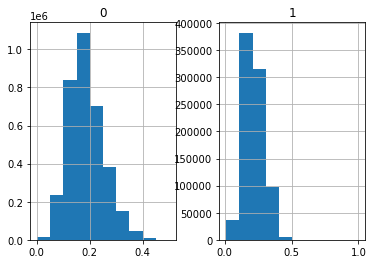

In [8]:
#값 확인
df_prep[['SAFE_MEAN','SAFE_CENTER_NM']].head()
df_pivot = df_prep.pivot_table(columns="GOLDEN", index=df_prep.index, values="SAFE_MEAN")
df_pivot.hist()

### 전처리 추가작업 필요 (관할구역 데이터)

### 시간대 구간화(6시간씩, 쿼터별로 나눠서)

### 골든타임 준수여부 열추가

In [ ]:
df_prep = pd.read_csv("aid_prep_0622.csv", encoding='utf-8-sig')

In [ ]:
# 골든타임 5분 설정시 준수여부 열추가
df_prep['GOLDEN'] = df_prep['MOVE_TM'].apply(lambda x : x<= 5)

## 훈련용 데이터셋 분할

In [9]:
# 훈련용 데이터셋 분할

from sklearn.model_selection import train_test_split

x = df_prep[['ONSPOT_DSTN','CONSCS_STATE','ONSPOT_TM','SAFE_MEAN','FIRE_MEAN']]
y = df_prep['MOVE_TM']

In [10]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

## 회귀분석 시도

In [11]:
# 다중회귀분석 실시

from sklearn.linear_model import LinearRegression
model_LGH = LinearRegression()
model_LGH.fit(train_x, train_y)

LinearRegression()

In [12]:
model_LGH.score(train_x, train_y)

0.002866756548050131

In [ ]:
# cross_val_score 함수 활용

from sklearn.model_selection import cross_val_score
r2 = cross_val_score(model_LGH, train_x, train_y, cv=5)
r2

In [13]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_y, model_LGH.predict(train_x)))

126.16257411431303

In [ ]:
# stats_models 패키지 활용 모든 변수에 대한 모형 생성

import statsmodels.formula.api as smf

df_models_all = df_prep.drop(['PK','FIRESTTN_NM', 'SAFE_CENTER_NM'], axis=1)
df_models_all["GOLDEN"] = df_models_all['GOLDEN'].apply(lambda x : x*1)
df_models_all.head()

In [ ]:
df_models_all = df_prep.drop(['PK','FIRESTTN_NM', 'SAFE_CENTER_NM','GOLDEN', 'FIRE_MEAN','SAFE_MEAN'], axis=1)

In [ ]:
formula = "MOVE_TM~" + "+".join(df_models_all.iloc[:,1:].columns)
df_models_all = smf.ols(formula=formula, data=df_models_all).fit()

In [ ]:
df_models_all.summary()

In [ ]:
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [ ]:
lm = sm.OLS(df_prep['MOVE_TM'], df_prep[['ONSPOT_DSTN', 'FIRESTTN_NM', 'SAFE_CENTER_NM', 'CONSCS_STATE', 'ONSPOT_TM']])
results = lm.fit()
results.summary()

### 단순회귀분석 시도

In [ ]:
import statsmodels.formula.api as smf

In [14]:
# 전체 센터별 단순회귀분석 결과(결정계수) 출력함수

def center_R2(x) :
    R_square = []
    center = []
    for i in range(x):
        df_i = df_prep[df_prep['SAFE_CENTER_NM']==i]
        model = smf.ols(formula = 'MOVE_TM ~ ONSPOT_DSTN', data = df_i)
        result = model.fit()
        
        rsq_i = result.rsquared
        
        R_square.append(rsq_i)
        center.append('center_'+str(i))
        
        result_s = pd.Series(R_square, index=center)
    return result_s

In [ ]:
try :
    df_ck = centercheck(100).to_frame()
    sns.scatterplot(x="", y="", data = df_ck)
except : 
    pass

In [15]:
center_R2(10)

center_0    0.360152
center_1    0.011099
center_2    0.000095
center_3    0.000653
center_4    0.000048
center_5    0.002700
center_6    0.009960
center_7    0.005225
center_8    0.000903
center_9    0.286187
dtype: float64

In [ ]:
df1 = df_prep[df_prep['SAFE_CENTER_NM']==1]

In [16]:
df_prep.head(1)

,PK,FIRESTTN_NM,SAFE_CENTER_NM,MOVE_TM,ONSPOT_DSTN,CONSCS_STATE,ONSPOT_TM,GOLDEN,SAFE_MEAN,FIRE_MEAN
0,0,30,106,5.0,2.0,0,15,1,0.207011,0.18195


In [ ]:
model = smf.ols(formula = 'ONSPOT_DSTN ~ MOVE_TM', data = df)
result = model.fit()
result.rsquared

### 다중회귀분석 시도

In [2]:
df_prep = pd.read_csv("aid_prep_0622.csv", encoding='utf-8-sig')

In [3]:
# 골든타임 5분 설정시 준수여부 열추가
df_prep['GOLDEN'] = df_prep['MOVE_TM'].apply(lambda x : x<= 5)
df_prep["GOLDEN"] = df_prep['GOLDEN'].apply(lambda x : x*1)

# 안전센터 준수별 평균값 인코딩
df_form = df_prep.groupby("SAFE_CENTER_NM")['GOLDEN'].mean()
df_prep['SAFE_MEAN'] = df_prep['SAFE_CENTER_NM'].map(df_form)

# 소방서 준수별 평균값 인코딩
df_form2 = df_prep.groupby("FIRESTTN_NM")['GOLDEN'].mean()
df_prep['FIRE_MEAN'] = df_prep['FIRESTTN_NM'].map(df_form2)

## 2주차 데이터 전처리 재실시
### 레이블 인코딩 실시

In [2]:
# 데이터 불러오기

def setaidall():
    aid_all_total = pd.DataFrame(columns=['SUM_YY', 'SIGUN_NM', 'GOUT_FIRESTTN_NM', 'GOUT_SAFE_CENTER_NM',
       'STATMNT_YMD', 'STATMNT_TM', 'RECEPT_COURS', 'JURISD_DIV_NM',
       'GOUT_YMD', 'GOUT_TM', 'ONSPOT_ARVL_YMD', 'ONSPOT_ARVL_TM',
       'ONSPOT_DSTN', 'ONSPOT_DSTN_AOT1', 'ONSPOT_DSTN_AOT2', 'HOMING_YMD',
       'HOMING_TM', 'PATNT_AGE', 'PATNT_SEX_DIV_NM', 'EMRLF_SIDO_NM',
       'EMRLF_SIGNGU_NM', 'EMRLF_EMD_NM', 'EMRLF_LI_NM', 'FRGNR_YN',
       'NATNLTY_NM', 'PATNT_JOB', 'RELIF_OCCURPLC_TYPE', 'PATNT_SYMPTMS_TYPE',
       'PATNT_SYMPTMS_TYPE2', 'ACC_CAT1', 'ACC_CAT2', 'ACC_CAT3',
       'RELIF_ACDNT_ASORTMT_UP_NM', 'RELIF_ACDNT_ASORTMT_LOW_NM',
       'PATNT_OCCUR_TYPE', 'CONSCS_STATE_TYPE', 'AMBLNCWKR_QUALFCTN_RATG',
       'AMBLNCWKR_RATG', 'RELIF_SECTCHEF_QUALFCTN_RATG', 'TROUBLE'])
    for i in range(1,6):
        title = "aidall"+str(i)+"(u8s,eng,all,mt).csv"
        data = pd.read_csv(title,encoding='utf-8-sig')
        aid_all_total = pd.concat([aid_all_total,data],axis=0)
    aid_all_total.reset_index(drop=True,inplace=True)
    aid_all_total.reset_index(drop=False,inplace=True)
    aid_all_total.rename(columns ={'index':'PK'},inplace=True)
    return aid_all_total

In [3]:
aid_all_total = setaidall()

C:\Users\Goni L\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (39) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Goni L\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Goni L\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (1,25,28) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Goni L\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


MemoryError: Unable to allocate 1.20 GiB for an array with shape (36, 4472841) and data type object

In [4]:
from sklearn.preprocessing import LabelEncoder
safe = LabelEncoder() #안전센터
safe.fit(df_misdone.SAFE_CENTER_NM)

fire = LabelEncoder() # 소방서
fire.fit(df_misdone.FIRESTTN_NM) 

# 안전센터, 소방서 레이블 인코딩
safe_encoded = safe.transform(df_misdone.SAFE_CENTER_NM)
fire_encoded = fire.transform(df_misdone.FIRESTTN_NM)

# 기존 데이터 셋 인코딩 완료값으로 변경
df_misdone.SAFE_CENTER_NM = safe_encoded
df_misdone.FIRESTTN_NM = fire_encoded

NameError: name 'df_misdone' is not defined

In [ ]:
# 이외의 열 삭제
df_misdone.drop(['YMD','STATMNT_TM','ONSPOT_TM','ONSPOT_DSTN','HOMING_TM','CONSCS_STATE'], axis=1, inplace=True)
df_misdone.to_csv("aid_total_1821.csv", encoding="utf-8-sig", index=False)